In [1]:
from tkinter import *
from tkinter import ttk as ttk
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
import random
from sklearn.preprocessing import MinMaxScaler
from matplotlib.figure import Figure
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
class Task_1():

    def run_Task_1(self):
        self.df = pd.read_csv("penguins.csv")
        self.fill_null()
        self.encoding()
        self.normalization()
        return self.df

            
        
    def start_network(self,map_info):
        Adelie_train,Chinstrap_train,Gentoo_train, Adelie_test,Chinstrap_test,Gentoo_test = self.split()
        
        if ((map_info['class_1'] == 0 and map_info['class_2']==1 ) or (map_info['class_2'] == 0 and map_info['class_1']==1 ) ):
            train = self.join(Adelie_train,Chinstrap_train)
            test = self.join(Adelie_test,Chinstrap_test)
            train['species']=train['species'].replace(0, -1)
            train['species']=train['species'].replace(2, 1)
            test['species']=test['species'].replace(0, -1)
            test['species']=test['species'].replace(2, 1)
            w,b = self.neural_network_fit(train[[map_info["feature_1"] ,map_info["feature_2"] , 'species'] ] ,map_info,map_info["learning_rate"] ,map_info["have_bias"],map_info["num_of_epoches"] )
            actual,pred,error= self.neural_network_predict(test,map_info,w,b)
            res1 ,res2 , error_val=self.con_matrix(actual,pred,error)
            
            return res1 ,res2 , error_val, w , b
            
        elif ((map_info['class_1'] == 0 and map_info['class_2']==2 ) or (map_info['class_2'] == 0 and map_info['class_1']==2 ) ):
            train = self.join(Adelie_train,Gentoo_train)
            test = self.join(Adelie_test,Gentoo_test)
            train['species']=train['species'].replace(0, -1)
            train['species']=train['species'].replace(2, 1)
            test['species']=test['species'].replace(0, -1)
            test['species']=test['species'].replace(2, 1)
            w,b = self.neural_network_fit(train[[map_info["feature_1"] ,map_info["feature_2"] , 'species'] ],map_info ,map_info["learning_rate"] ,map_info["have_bias"],map_info["num_of_epoches"] )
            actual,pred,error =self.neural_network_predict(test,map_info,w,b)
            res1 ,res2 , error_val=self.con_matrix(actual,pred,error)
            
            return res1 ,res2 , error_val,w,b
            
        elif ((map_info['class_1'] == 2 and map_info['class_2']==1 ) or (map_info['class_2'] == 2 and map_info['class_1']==1 ) ):
            train = self.join(Gentoo_train,Chinstrap_train)
            test = self.join(Gentoo_test,Chinstrap_test)
            train['species']=train['species'].replace(0, -1)
            train['species']=train['species'].replace(2, 1)
            test['species']=test['species'].replace(0, -1)
            test['species']=test['species'].replace(2, 1)
            w,b = self.neural_network_fit(train[[map_info["feature_1"] ,map_info["feature_2"] , 'species'] ],map_info ,map_info["learning_rate"] ,map_info["have_bias"],map_info["num_of_epoches"] )
            actual,pred,error=self.neural_network_predict(test,map_info,w,b)
            res1 ,res2 , error_val=self.con_matrix(actual,pred,error)
            return res1 ,res2 , error_val ,w,b
        
    def normalization(self):
        scaler = MinMaxScaler()
        self.df["bill_length_mm"] = scaler.fit_transform(self.df[["bill_length_mm"]])
        self.df["bill_depth_mm"] = scaler.fit_transform(self.df[["bill_depth_mm"]])
        self.df["flipper_length_mm"] = scaler.fit_transform(self.df[["flipper_length_mm"]])
        self.df["body_mass_g"] = scaler.fit_transform(self.df[["body_mass_g"]])
        
        

    def fill_null(self):
        null_cols = self.df.columns[self.df.isnull().any()]
        for col in null_cols:
            type_of = str(self.df[col].dtype)
            if type_of == "object":
                self.df[col] = self.df[col].fillna(self.df[col].mode()[0])
            else:
                self.df[col] = self.df[col].fillna(self.df[col].mean())

        
    def encoding(self):
        encoder = LabelEncoder()
        cat_cols = self.df.select_dtypes(include='object').columns.tolist()
        for col in cat_cols:
            self.df[col] = encoder.fit_transform(self.df[col])
        
    
    def split(self):
        self.df=self.df.sample(frac=1,replace=False).reset_index(drop=True)
        Adelie = self.df.loc[(self.df["species"] == 0)]
        Chinstrap= self.df.loc[(self.df["species"] == 1)]
        Gentoo=self.df.loc[(self.df["species"] == 2)]
        
        Adelie_train=Adelie.head(30)
        Chinstrap_train=Chinstrap.head(30)
        Gentoo_train = Gentoo.head(30)
        
        Adelie_test=Adelie.tail(20)
        Chinstrap_test=Chinstrap.tail(20)
        Gentoo_test = Gentoo.tail(20)
        
        return Adelie_train,Chinstrap_train,Gentoo_train, Adelie_test,Chinstrap_test,Gentoo_test
    
    
    def join(self,x,y):
        
        out = pd.concat([x,y] ,axis=0).sample(frac=1).reset_index(drop=True)
        
        return out
        
    def signum(self,x):
        return np.where(x >= 0, 1, -1).reshape(x.shape[0])
    
    def get_class_from_num(self,x):
        if x == 0:
            return "Adelie"
        elif x == 1:
            return "Chinstrap"
        else:
            return "Gentoo"

    
    def neural_network_fit(self , train ,map_info, learn_rate , bias , epoches ):
        tempo = np.ones((1,60))
        w=np.random.rand(2, 1)
        b =0
        if bias == True:
            b=random.random()
            
        x = train[[map_info["feature_1"],map_info["feature_2"]]]
        actual = train ["species"]
        x=x.values
        actual=actual.values
        actual=actual.reshape((60,1))
 
        for i in range(epoches):
            y = np.dot(x,w) + b
            pred = np.sign(y)
            
            error = actual - pred
            w1 = (learn_rate*np.dot(x.T,error))
            w = w + w1.reshape(w.shape)
            
            if bias == True:
                
                b += learn_rate * np.dot(tempo,error)
            mse=np.square(error)
            mse = mse * 0.5
            mse= np.sum(mse)
            mse = mse/60
            if(mse <= map_info["MSE"]):
                break
            
            
                
        return w,b
        
        
        
        
        
    def neural_network_predict(self,test,map_info,w,b):
        x = test[[map_info["feature_1"],map_info["feature_2"]]]
        actual = test ["species"]
        
        x=x.values
        actual =actual.values
        actual=actual.reshape((40,1))
        
        y = np.dot(x,w) + b
        pred = np.sign(y)
        
        error = actual - pred
        return actual,pred,error
    
    
    def neural_network_predict22(self,x,w,b):
        y = np.dot(x,w) + b
        pred = np.sign(y)
        return y
        
        
        
    def con_matrix(self,actual,pred,error):
        tp_c_1=0
        tn_c_1=0
        fp_c_1=0
        fn_c_1=0
        
        tp_c_n1=0
        tn_c_n1=0
        fp_c_n1=0
        fn_c_n1=0
        
        for i in range(len(actual)):
            if (actual[i] == pred[i]) and (pred[i] == 1):
                tp_c_1+=1
                tn_c_n1+=1
            if (actual[i] == pred[i]) and (pred[i] == -1):
                tp_c_n1+=1
                tn_c_1+=1
                
            if (pred[i] == 1) and (actual[i] != 1):
                fp_c_1+=1
                fn_c_n1+=1
                
            if (pred[i] == -1) and (actual[i] != -1):
                fp_c_n1+=1
                fn_c_1+=1
        
        res1 = { "tp_1" :tp_c_1 ,
               "tn_1" :tn_c_1 ,
               "fp_1" :fp_c_1 ,
               "fn_1" : fn_c_1
                }
        
        res2 = { "tp_n1" :tp_c_n1 ,
               "tn_n1" :tn_c_n1 ,
               "fp_n1" :fp_c_n1 ,
               "fn_n1" : fn_c_n1
                }  
        error_val = abs(np.sum(error))
        
        error_val = error_val / 2
        error_val = error_val / 60
        return res1 ,res2 , error_val
        
        

    


In [3]:

class GUI():
    
    def __init__(self):
        self.task_1 = Task_1()
        self.df=self.task_1.run_Task_1()
        
    def load_gui(self):
        self.root = Tk()
        screen_width = self.root.winfo_screenwidth()
        screen_height = self.root.winfo_screenheight()
        self.screen_x = (screen_width / 2) - (500 / 2)
        self.screen_y= (screen_height / 2) - (800 / 2)
        self.root.geometry("%dx%d+%d+%d" % (500, 800, self.screen_x, self.screen_y))

        feature_1_label = Label(self.root, text="Choose Feature 1 :")
        feature_1_label.place(x=10 , y=10)
        feature_1_opt = ["bill_length_mm", "bill_depth_mm","flipper_length_mm" ,"body_mass_g" ,"gender"]
        feature_1_combo = ttk.Combobox(self.root , values = feature_1_opt)
        feature_1_combo.place (x=200 ,y=10)

        feature_2_label = Label(self.root, text="Choose Feature 2 :")
        feature_2_label.place(x=10 , y=50)
        feature_2_opt = ["bill_length_mm", "bill_depth_mm","flipper_length_mm" ,"body_mass_g" ,"gender"]
        feature_2_combo = ttk.Combobox(self.root , values = feature_2_opt)
        feature_2_combo.place (x=200 ,y=50)

        class_1_label = Label(self.root, text="Choose Class 1 :")
        class_1_label.place(x=10 , y=90)
        class_1_opt = ["Adelie", "Gentoo","Chinstrap" ]
        class_1_combo = ttk.Combobox(self.root , values = class_1_opt)
        class_1_combo.place (x=200 ,y=90)

        class_2_label = Label(self.root, text="Choose Class 2 :")
        class_2_label.place(x=10 , y=130)
        class_2_opt = ["Adelie", "Gentoo","Chinstrap" ]
        class_2_combo = ttk.Combobox(self.root , values = class_2_opt)
        class_2_combo.place (x=200 ,y=130)

        learning_rate_label = Label(self.root, text="Choose Learning Rate :")
        learning_rate_label.place(x=10 , y=170)
        learning_rate_input = Entry(self.root)
        learning_rate_input.place(x=200 , y=170)

        epochs_label = Label(self.root, text="Choose Epoches :")
        epochs_label.place(x=10 , y=210)
        epochs_input = Entry(self.root)
        epochs_input.place(x=200 , y=210)
        
        mse_label = Label(self.root, text="Enter MSE :")
        mse_label.place(x=10 , y=250)
        mse_input = Entry(self.root)
        mse_input.place(x=200 , y=250)

        bias_choice = BooleanVar()
        bias_input = Checkbutton(self.root, text="Bias or Not ?" ,variable=bias_choice)
        bias_input.place(x=200 , y=290)
        
        run_btn = Button(self.root , text="Run" ,width=50 ,fg="green" ,command=lambda:self.run_button(feature_1_combo.get(),feature_2_combo.get(),class_1_combo.get(),class_2_combo.get(),mse_input.get(),epochs_input.get(),learning_rate_input.get(),bias_choice.get()))
        run_btn.place(x=50 , y=330)

        visualize_btn = Button(self.root , text="Visualize" ,width=50 ,fg="blue" ,command=lambda:self.viualizing_button(feature_1_combo.get(),feature_2_combo.get(),class_1_combo.get(),class_2_combo.get()))
        visualize_btn.place(x=50 , y=370)
        self.root.mainloop()
        
    def run_button(self,feature_1,feature_2,class_1,class_2,mse,epoches,learn_rate,bias):
        class_map = {"Adelie":0 ,"Chinstrap":1 ,"Gentoo":2}
        class_1 = class_map[class_1]
        class_2 = class_map[class_2]
        
        self.map_info = {
            "class_1":class_1 ,
            "class_2":class_2,
            "feature_1": feature_1,
            "feature_2": feature_2 ,
            "num_of_epoches": int(epoches),
            "learning_rate":float(learn_rate),
            "MSE" : float(mse),
            "have_bias": bias
        }
        

            
        res1 ,res2 , error_val ,w ,b = self.task_1.start_network(self.map_info)
        
        #print(error_val)

        self.second_window(res1 ,res2 , error_val ,w,b)


            
    def second_window(self , res1 ,res2 ,error ,w,b):
        self.new_window_1 = Tk()
        self.new_window_1.geometry("%dx%d+%d+%d" % (500, 800, self.screen_x, self.screen_y))
        cm_abel = Label(self.new_window_1, text="Confussion Matrix for 1")
        cm_abel.place(x=10 , y=10)
        
        line1=Label(self.new_window_1, text="------------------------")
        line1.place(x=10 , y=40)
        #--------------------
        tp_label=Label(self.new_window_1, text="True Positive")
        tp_label.place(x=10 , y=60)
        
        tp_label_v=Label(self.new_window_1, text=str(res1["tp_1"]))
        tp_label_v.place(x=100 , y=60)    
        #--------------------
        
        tn_label=Label(self.new_window_1, text="True Negative")
        tn_label.place(x=300 , y=60)
        
        tn_label_v=Label(self.new_window_1, text=str(res1["tn_1"]))
        tn_label_v.place(x=400 , y=60)
        #--------------------
        
        fp_label=Label(self.new_window_1, text="False Positive")
        fp_label.place(x=10 , y=90)
        
        fp_label_v=Label(self.new_window_1, text=str(res1["fp_1"]))
        fp_label_v.place(x=100 , y=90)
        #--------------------
                
        fn_label=Label(self.new_window_1, text="False Negative")
        fn_label.place(x=300 , y=90)
        
        fn_label_v=Label(self.new_window_1, text=str(res1["fn_1"]))
        fn_label_v.place(x=400 , y=90)
        #------------------------------------------------------------------------------------------
        line11=Label(self.new_window_1, text="---------------------------------------------------------------------------")
        line11.place(x=10 , y=110)
        
        cm_label = Label(self.new_window_1, text="Confussion Matrix for -1")
        cm_label.place(x=10 , y=130)
        
        line111=Label(self.new_window_1, text="------------------------")
        line111.place(x=10 , y=150)
        
        #--------------------
        
        tp1_label=Label(self.new_window_1, text="True Positive")
        tp1_label.place(x=10 , y=170)
        
        tp1_label=Label(self.new_window_1, text=str(res2["tp_n1"]))
        tp1_label.place(x=110 , y=170)
        #--------------------
                
        tn1_label=Label(self.new_window_1, text="True Negative")
        tn1_label.place(x=300 , y=170)
        
        tn1_label_v=Label(self.new_window_1, text=str(res2["tn_n1"]))
        tn1_label_v.place(x=400 , y=170)
        #--------------------
        
        fp1_label=Label(self.new_window_1, text="False Positive")
        fp1_label.place(x=10 , y=200)
        
        fp1_label_v=Label(self.new_window_1, text=str(res2["fp_n1"]))
        fp1_label_v.place(x=110 , y=200)
        #--------------------
                
        fn1_label=Label(self.new_window_1, text="False Negative")
        fn1_label.place(x=300 , y=200)
        
        fn1_label_v=Label(self.new_window_1, text=str(res2["fn_n1"]))
        fn1_label_v.place(x=400 , y=200)
        #--------------------
        line111=Label(self.new_window_1, text="---------------------------------------------------------------------------")
        line111.place(x=10 , y=230)
        
        err = Label(self.new_window_1, text="Error is : ")
        err.place(x=10 ,y=260)
        err_lbl = Label(self.new_window_1, text=str(error))
        err_lbl.place(x=110 ,y=260)
        
        #--------------------
        b=np.sum(b)
        slope = -(w[0] / w[1])
        intercept = -(b / w[1])
        
        class_1 = self.map_info["class_1"]
        class_2 = self.map_info["class_2"]
        
        data1 = self.df.loc[self.df["species"] == class_1] 
        data2 = self.df.loc[self.df["species"] == class_2]
        
        #----------------------
        mapp={0:False , 1:False , 2:False}
        mapp[class_1] = True
        mapp[class_2] = True
        
        temppe=0
        for k , v in mapp.items():
            if v == False:
                temppe=k
        
        #----------------------                  
        
        data3= self.df.loc[self.df["species"] != temppe  ]
        
        
        x1_min, x1_max = data3[self.map_info["feature_1"]].min() - 1, data3[self.map_info["feature_1"]].max() + 1
        x2_min, x2_max = data3[self.map_info["feature_2"]].min() - 1, data3[self.map_info["feature_2"]].max() + 1
        xx, yy = np.meshgrid(np.arange(x1_min, x1_max, 0.1),
                              np.arange(x2_min, x2_max, 0.1))
        
        obj = Task_1()
        Z = obj.neural_network_predict22(np.c_[xx.ravel(), yy.ravel()] , w ,b)
        Z = Z.reshape(xx.shape)
        cmap = ListedColormap(['#FF0000', '#00FF00'])
        fig, ax = plt.subplots()
        ax.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        
        ax.scatter(data3[self.map_info["feature_1"]],data3[self.map_info["feature_2"]], c=data3["species"], cmap=cmap)
        ax.set_xlabel(self.map_info["feature_1"])
        ax.set_ylabel(self.map_info["feature_2"])
        ax.set_title('Decision Boundary')
        
        canvas = FigureCanvasTkAgg(fig, master=self.new_window_1)
        canvas.draw()
        canvas.get_tk_widget().place(x=-10 , y=360)
        
        
#         fig = Figure(figsize=(5, 4), dpi=100)
#         ax =fig.add_subplot(111)
#         ax.scatter(data1[self.map_info["feature_1"]], data1[self.map_info["feature_2"]], c='r', label=self.task_1.get_class_from_num(class_1))
#         ax.scatter(data2[self.map_info["feature_1"]], data2[self.map_info["feature_2"]], c='b', label=self.task_1.get_class_from_num(class_2))
#         ax.plot(x_vals,y_vals)
#         ax.set_xlabel(self.map_info["feature_1"])
#         ax.set_ylabel(self.map_info["feature_2"])
#         ax.legend()
#         canvas = FigureCanvasTkAgg(fig, master=self.new_window_1)
#         canvas.draw()
#         canvas.get_tk_widget().place(x=10 , y=360)
        
        


        
    def viualizing_button(self,feature_1,feature_2,class_1,class_2):
        class_map = {"Adelie":0 ,"Chinstrap":1 ,"Gentoo":2}
        class_1 = class_map[class_1]
        class_2 = class_map[class_2]
        
        data1 = self.df.loc[self.df["species"] == class_1] 
        data2 = self.df.loc[self.df["species"] == class_2]
        
        fig = Figure(figsize=(5, 4), dpi=100)
        ax =fig.add_subplot(111)
        ax.scatter(data1[feature_1], data1[feature_2], c='r', label=self.task_1.get_class_from_num(class_1))
        ax.scatter(data2[feature_1], data2[feature_2], c='b', label=self.task_1.get_class_from_num(class_2))
        ax.set_xlabel(feature_1)
        ax.set_ylabel(feature_2)
        ax.legend()
        canvas = FigureCanvasTkAgg(fig, master=self.root)
        canvas.draw()
        canvas.get_tk_widget().place(x=10 , y=360)
        
    
    



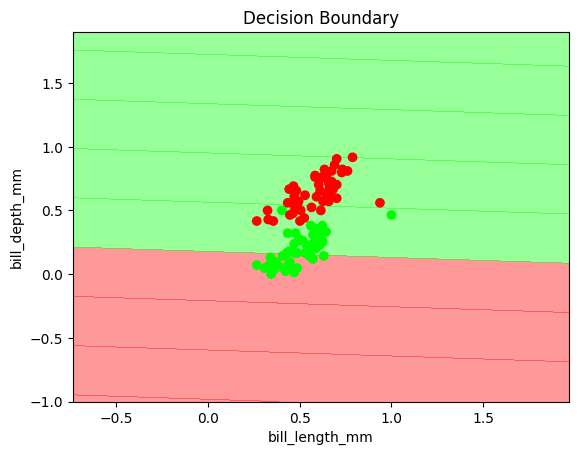

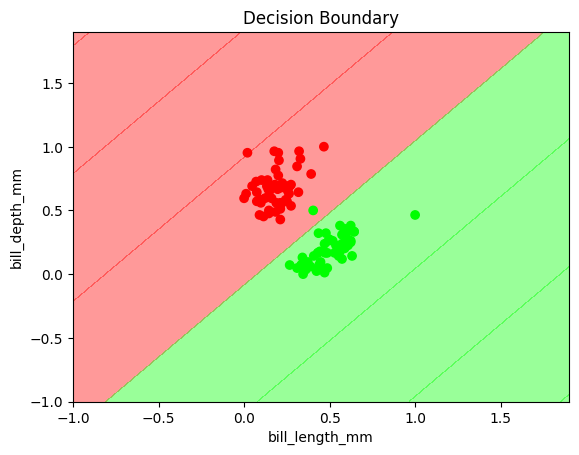

In [4]:
gui = GUI()
gui.load_gui()